## Описание проекта
### Контекст
* Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
* Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

---

##  Часть 1. Приоритезация гипотез.
 __В файле hypothesis.csv__ 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
### Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

---

## Часть 2. Анализ A/B-теста
 Вы провели A/B-тест и получили результаты, которые описаны в файлах __orders.csv__ и __visitors.csv.__
### Задача
__Проанализируйте A/B-тест:__
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. 
    * Варианты решений: 
        1. Остановить тест, зафиксировать победу одной из групп. 
        2. Остановить тест, зафиксировать отсутствие различий между группами. 
        3. Продолжить тест.
----

## Описание данных
__Файл hypothesis.csv__
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

__Файл orders.csv__
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

__Файл visitors.csv__
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
import warnings
import scipy.stats as stats
import math as mth
import pylab
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,8)})

In [2]:
visitors = pd.read_csv('/datasets/visitors.csv')
orders = pd.read_csv('/datasets/orders.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
def firstlook(df):
    print()
    print('=================')
    print(f'Размер датафрейма \n{df.shape}')
    print()
    print('=================')
    print(f'Info \n{df.info()}')
    print()
    print('=================')
    print(f'Доля пропущенных значений \n{df.isna().sum()/df.shape[0]}')
    print()
    print('=================')
    print(f'Количество дубликатов \n{df.duplicated().sum()}')
    print()
    print('=================')
    print(f'Описание данных \n{df.describe()}')
    return df.head()

### Датафрейм visitors

In [4]:
firstlook(visitors)


Размер датафрейма 
(62, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
Info 
None

Доля пропущенных значений 
date        0.0
group       0.0
visitors    0.0
dtype: float64

Количество дубликатов 
0

Описание данных 
         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Датафрейм orders

In [5]:
firstlook(orders)


Размер датафрейма 
(1197, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB
Info 
None

Доля пропущенных значений 
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

Количество дубликатов 
0

Описание данных 
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03  1.197000e+03
mean    2.155621e+09  2.165960e+09  8.348006e+03
std     1.229085e+09  1.236014e+09  3.919113e+04
min     1.062393e+06  5.114589e+06  5.000000e+01
25%     1.166776e+09  1.111826e+09  1.220000e+03
50%     2.145194e+09  2.217985e+09  2.978000e+03
75%     3.237740e+09  3.177606e+09  8.290000e+03
max     4.293856e+09  4.283872

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Датафрейм hypothesis

In [6]:
firstlook(hypothesis)


Размер датафрейма 
(9, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes
Info 
None

Доля пропущенных значений 
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

Количество дубликатов 
0

Описание данных 
           Reach     Impact  Confidence    Efforts
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


## Предобработка

* Похоже что данные во всех датафреймах впорядке, остается только:
    1. Привести даты в нужных формат
    2. Привести названия столбцов в датафрейме hypothesis к общему стилю - нижний регистр

In [7]:
def firstchange(df):
    '''
    Предобработка данных: 
    приводит все названия колонок в нижний регистр и даты в формат datetime.
    Возвращает метод info.
    '''
    df.columns = [column_name.lower() for column_name in df]
    for column_name in df:
        if 'date' in column_name:
            df[column_name] = pd.to_datetime(df[column_name])
    return df.info()

In [8]:
firstchange(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes


In [9]:
firstchange(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.8+ KB


In [10]:
firstchange(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


----
----

##  Часть 1. Приоритизация гипотез.
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [11]:
def prioritization_hypothesis(data, fm_type):
    
    if fm_type == 'ICE':
        data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
    else:
        data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts']
    
    ax = (data[['hypothesis', fm_type]].set_index('hypothesis'))\
                            .sort_values(fm_type, ascending=True)\
                            .plot(kind='barh')
    ax.set(title=f'Приоритизация гипотез в фреймворке {fm_type}', xlabel=f'Приоритет / {fm_type}')
    plt.show()

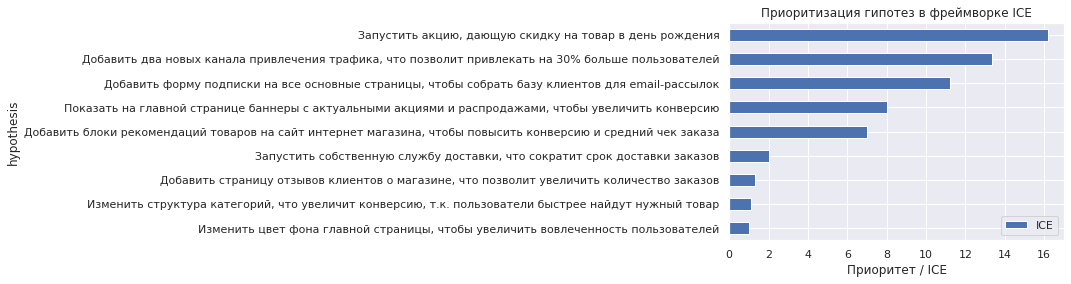

In [12]:
prioritization_hypothesis(hypothesis, 'ICE')

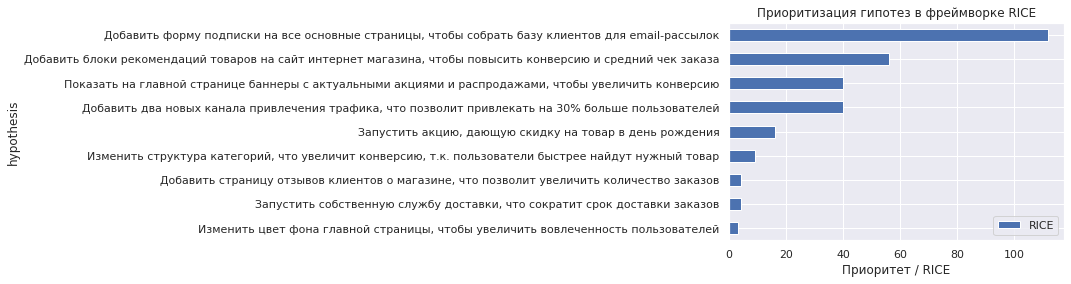

In [13]:
prioritization_hypothesis(hypothesis, 'RICE')

In [14]:
hypothesis.sort_values('reach', ascending=False).head(1)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0


## Вывод:
   * После изменения фреймворка изменилось ранжирование гипотез на основе рассчитанного рейтинга ICE/RICE, тк в формуле расчета ICE не учитывается компонент rich (охват пользователей).

---
---

## Часть 2. Анализ A/B-теста
Проанализируйте A/B-тест

### Создадим датафрейм, в котором соберем кумулятивные метрики по дням для группы A и группы B
* тк мне не понравилось предложенное решение в тренажере, решил через groupby и cumsum

In [15]:
# Готовим датафрейм, собираем агрегаты для каждой группы каждого дня
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                  .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                  .rename(columns={'transactionid':'orders','visitorid':'buyers'})
# Копируем столбец по которому будет производится кумулятивное суммирование
orders_grouped['group_copy'] = orders_grouped['group']
# Столбцы, которые нет необходимости суммировать, убираем в индекс
orders_grouped.set_index(['date','group'], inplace=True)
# Сортируем и применяем cumsum
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [16]:
orders_cumsum.head()

,date,group,orders,buyers,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,44,39,242401
3,2019-08-02,B,45,43,266748
4,2019-08-03,A,68,63,354874


### Посчитаем кумулятивную сумму визитов за каждый день в каждой группе

In [17]:
#посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'})\
        .sort_values(['date','group'])
#скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()                                    

In [18]:
visitors_cumsum.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845


### Объединим датафреймы по индексам

In [19]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [20]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845


## Напишем функции для визуализации кумулятивных метрик в группе А и Б, а так же их относительного различия в % 
* share(%) = cumetricB/cumetricA-1

In [21]:
def viz_cummulative(df, cummulative_metric='revenue'):
    '''
    Принимает датафрейм с куммулятивными статистиками по дням, делит на группу А и B
    Считает необходимые метрики
    Строит графики как изменяется куммулятивная метрика по дням в обоих группах
    Визуализирует изменение дисперсии в группах по необходимой метрике
    '''
    if cummulative_metric not in ['mean_bill','conversion','revenue','orders','visitors','buyers']:
        return print('Некорректная метрика')
    else:
        df['mean_bill'] = df['revenue']/df['orders']
        df['conversion'] = df['orders']/df['visitors']
        cummulativeA = df[df['group']=='A'][['date', cummulative_metric]]
        cummulativeB = df[df['group']=='B'][['date', cummulative_metric]]
        
        plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
        plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
        plt.title(f'Кумулятивной график для метрики {cummulative_metric} в группах A и B')
        plt.ylabel(cummulative_metric)
        #plt.tick_params(axis='both', which='major', labelsize=5)
        plt.legend()
        plt.show()
        relative_metrics_in_groups(cummulativeA, cummulativeB, cummulative_metric)

In [22]:
def relative_metrics_in_groups(cummulativeA, cummulativeB, cummulative_metric):
    '''
    Разделяет датафреймы на группу А и группу Б, мержит и считает за каждую дату относительное изменение
    по необходимой кумулятивной метрике: metrics_B/metrics_A-1, строит график
    Позволяет предварительно оценить АБ тест
    Получает данные из функции viz_cummulative
    '''
    df = (cummulativeA[['date', cummulative_metric]].merge(cummulativeB[['date', cummulative_metric]], 
                                            left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
    plt.plot(df['date'], df[cummulative_metric+'B']/df[cummulative_metric+'A']-1, 
             label=f"Относительный прирост {cummulative_metric} группы B относительно группы A")
    plt.title(f'График относительного различия (в %) кумулятивной метрики {cummulative_metric} B/A-1')
    plt.legend()
    plt.axhline(y=0, color='black', linestyle='--')
    #plt.axhline(y=-0.1, color='grey', linestyle='--')
    plt.show()
    sns.set(rc={'figure.figsize':(14,8)})

---

### Куммулятивные графики для Revenue и относительные графики различия Revenue в группах

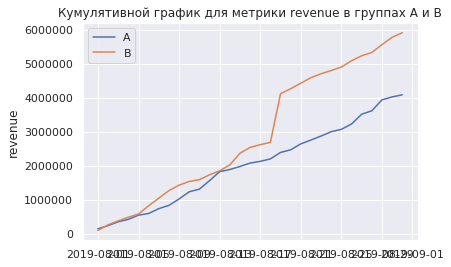

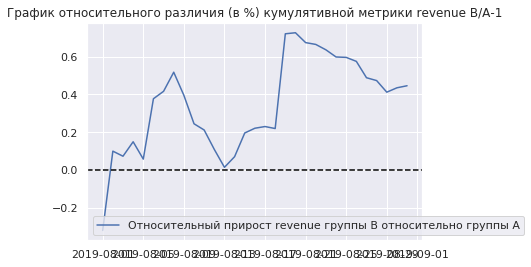

In [23]:
viz_cummulative(cummulative, 'revenue' )
sns.set(rc={'figure.figsize':(14,8)})

## Вывод: 
* Выручка в группе B опережает выручку в контрольной группе, но на графике виден резкий скачек, когда пришли аномальные большие заказы. 
* Такие выбросы искажают действительность, необходимо снизит дисперсию, удалив выбросы.

---

### Куммулятивный график для среднего чека и относительный график различия среднего чека в группах

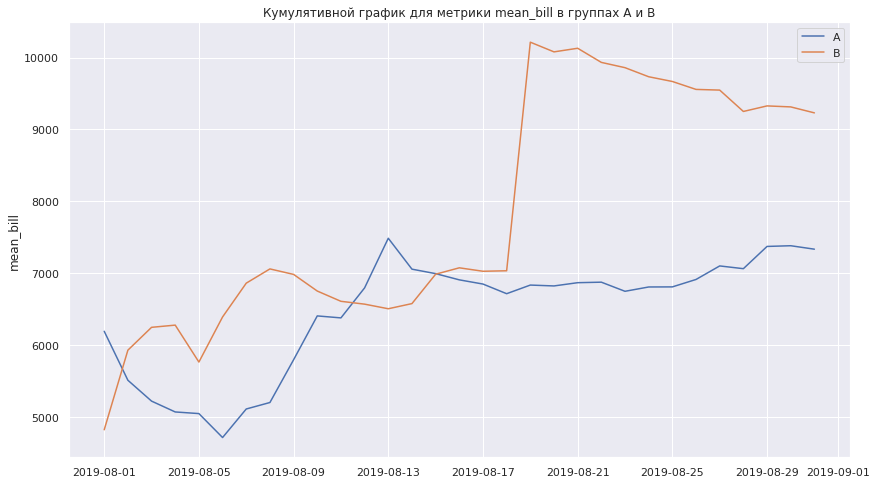

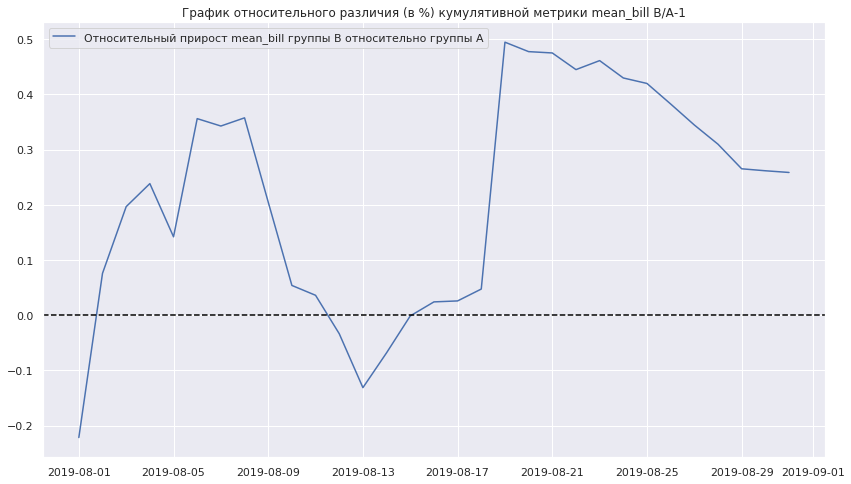

In [24]:
viz_cummulative(cummulative, 'mean_bill' )

## Вывод:
* Как и на графиках с Revenue мы видим резкий скачок суммы среднего чека в группе B. Необходимо удалить выбросы.

---

### Куммулятивные графики конверсии и относительные графики различия конверсии в группах

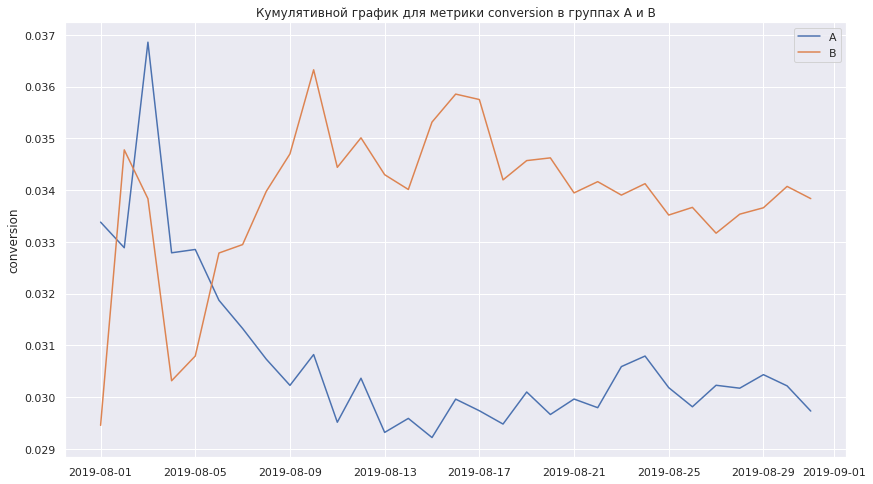

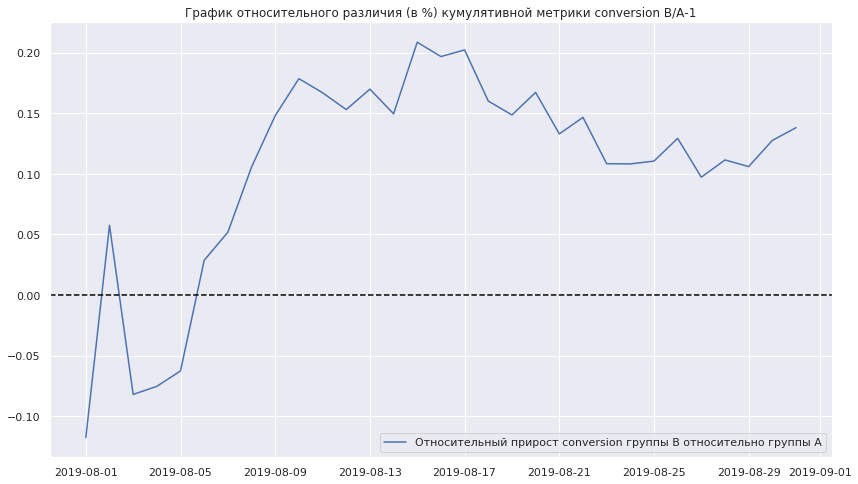

In [25]:
viz_cummulative(cummulative, 'conversion' )

## Вывод:
* Кумулятивные графики конверсии в группах не вышли на плато, но уже видно, что в тестовом варианте(группа B) конверсия выше как минимум на 10% относительно конверсии в группе A. Похоже, что вариант B лучше варианта A, но лучше еще подождать.

---
---

## Построим точечные графики количества заказов и стоимости заказов. Посчитаем перцентили для отсечения выбросов.
1. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

2. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

### Напишем функцию для отрисовки дотплот и рассчета перцентилей

In [26]:
def dotplot_and_percentile(df, metrics):
    '''
    Строит графики dotplot для метрик: (количество заказов на уника, стоимость заказов)
    Считает 90, 95, 99 перцентиль 
    Позволяет визуально найти выбросы и определить перцентиль на отсечения выбросов
    На оси абсцисс номер наблюдения в датафрейме, на оси ординат - значение метрики
    '''
    print(f'Точечный график наблюдений для {metrics}')
    percent_ille = np.percentile(df[metrics], [90, 95, 99])
    print(f'90 перцентиль {metrics}: {percent_ille[0]:.1f}\n 95 перцентиль {metrics}: {percent_ille[1]:.1f}\n 99 перцентиль {metrics}: {percent_ille[2]:.1f}')
    x_values = pd.Series(range(0,len(df[metrics])))
    plt.scatter(x_values, df[metrics], alpha=0.65, marker=(3, 0), color='b')
    plt.show()

### Построим график и перцентили по стоимости заказов
* тк нас интересует стоимость каждого заказа, используем изначальный датафрейм orders

Точечный график наблюдений для revenue
90 перцентиль revenue: 18168.0
 95 перцентиль revenue: 28000.0
 99 перцентиль revenue: 58233.2


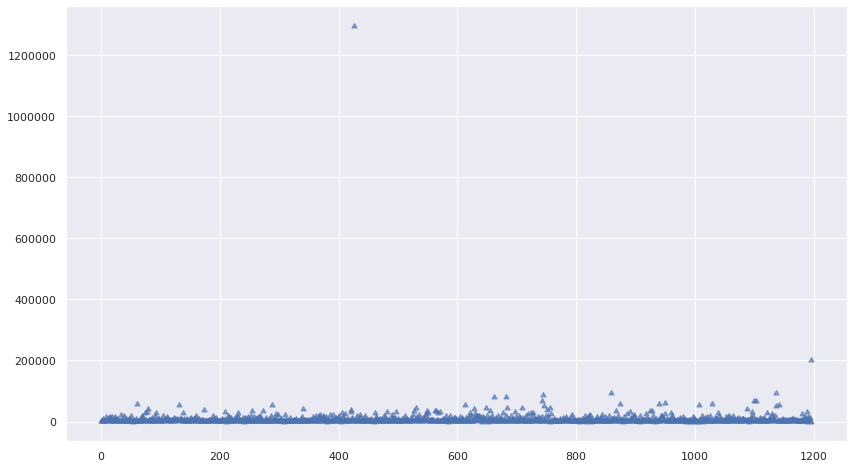

In [27]:
dotplot_and_percentile(orders,'revenue')

## Вывод:
* На графике явно видны два выброса, которые находятся выше 99 перцентиля.
* За отсечку возьмем 99 перцентиль
* threshold = 58200
* Ниже создадим новый датафрейм orders_clear в котором удалим дорогие заказы, посчитаем сколько наблюдений мы удалили

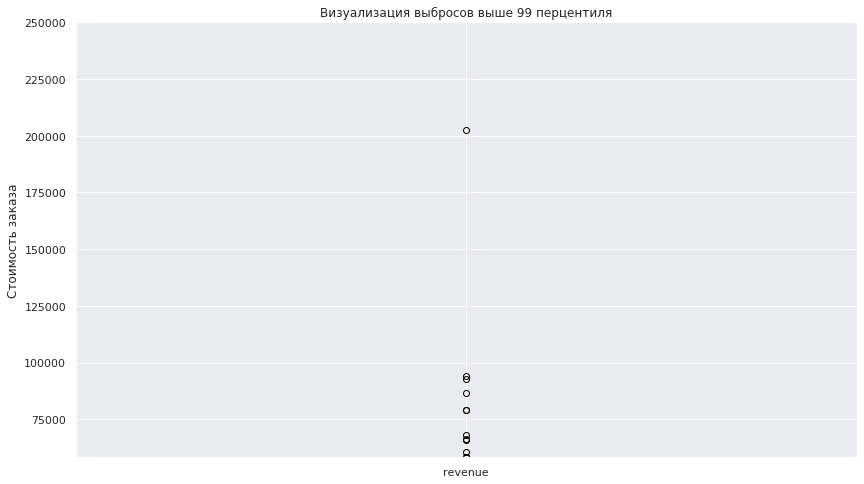

In [28]:
plot = orders.boxplot('revenue')
plot.set_ylim(58200, 250000)
plot.set_title('Визуализация выбросов выше 99 перцентиля')
plot.set_ylabel('Стоимость заказа')
plt.show()

In [29]:
orders_clear = orders[orders['revenue']<=58200]

In [30]:
print(f'Количество удаленных выбросов = {orders.shape[0]-orders_clear.shape[0]}')

Количество удаленных выбросов = 14


---

### Построим точечный график и перцентили по количеству заказов на пользователя

In [31]:
#сформируем датафрейм по количеству уникальных заказов на пользователя
orders_per_unique_user = orders.groupby('visitorid',as_index=False).agg({'transactionid':'nunique'})\
                                                                   .rename(columns={'transactionid':'orders'})

Точечный график наблюдений для orders
90 перцентиль orders: 1.0
 95 перцентиль orders: 2.0
 99 перцентиль orders: 4.0


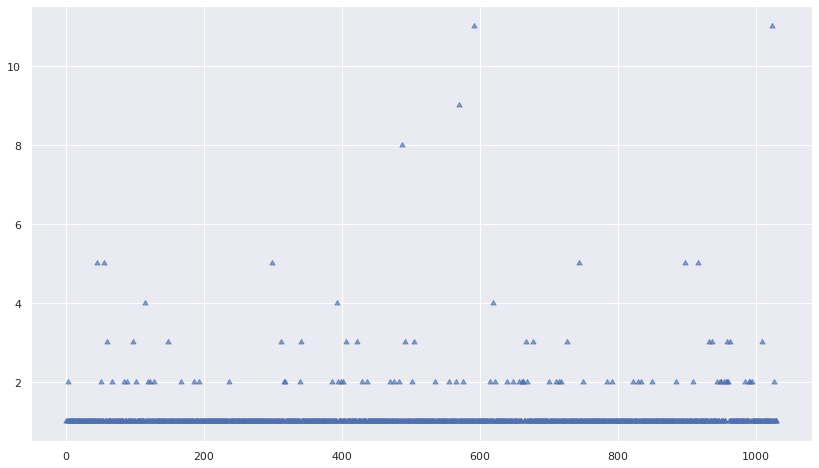

In [32]:
dotplot_and_percentile(orders_per_unique_user, 'orders')

## Вывод:
* За отсечку примем 99 перцентиль, удалим пользователей с >= 4 заказов
* Сохраним таких юзеров в список, чтобы удалить их в последующем (перед стат тестом)

In [33]:
TooManyOrdersId = orders_per_unique_user[orders_per_unique_user['orders']>=4]['visitorid'].to_list()

---
---

## Посчитаем статистическую значимость ARPPU в группе A и B.
   * Для сырых и очищенных данных

### Для того, чтобы выбрать тип статистического критерия, необходимо провести тест на нормальноть. 
* Это можно сделать несколькими способами: 
    * __Визуально__
        * гистограмма / QQPlot
    * __На основе статистик__
         * в качестве теста выберем Shapiro-Wilk
    * __Рассчетом параметров распределения skew/median/mean__

In [34]:
def shapiro_wilk_test(df, title, bins_for_hist=100):
    '''
    Проверяет распределение на нормальность с помощью критерия Шапиро-Уилка
    Позволяет выбрать дальнейший критерий для оценки А/B теста - параметрический/непараметрический
    H0: распределение нормального вида; H1: распределение ненормального вида
    Считает p-value, строит гистограмму
    '''
    alpha = 0.05
    results = st.shapiro(df)
    p_value = results[1]
    print(f'p-значение:  {p_value:.10f}')
    if (p_value < alpha):
        print("Отвергаем H0: распределение не нормально")
    else:
        print("Не получилось H0, всё нормально")
    ax = df.plot(kind='hist', bins=bins_for_hist)
    ax.set(title=f'Распределение для {title}')
    plt.show()
    stats.probplot(df, dist="norm", plot=pylab)
    pylab.show()

----------

## <span style="color:green">Комментарий от наставника<span>

*Не получилось отклонить

---------

p-значение:  0.0000000000
Отвергаем H0: распределение не нормально


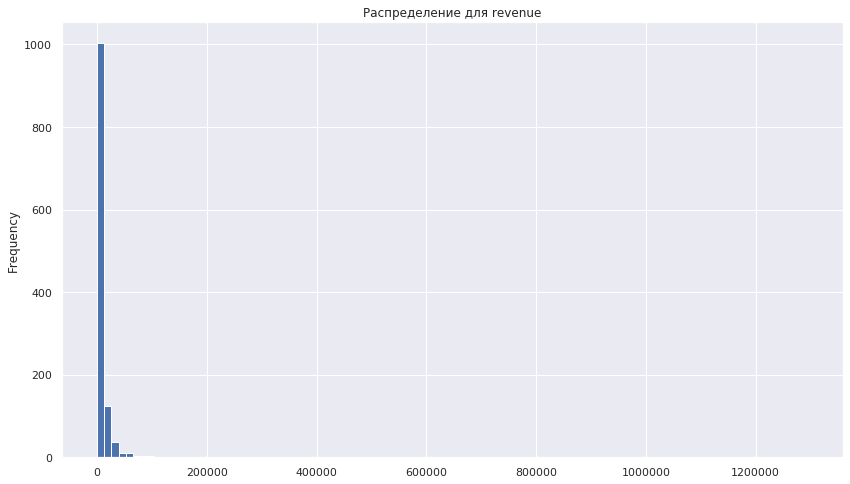

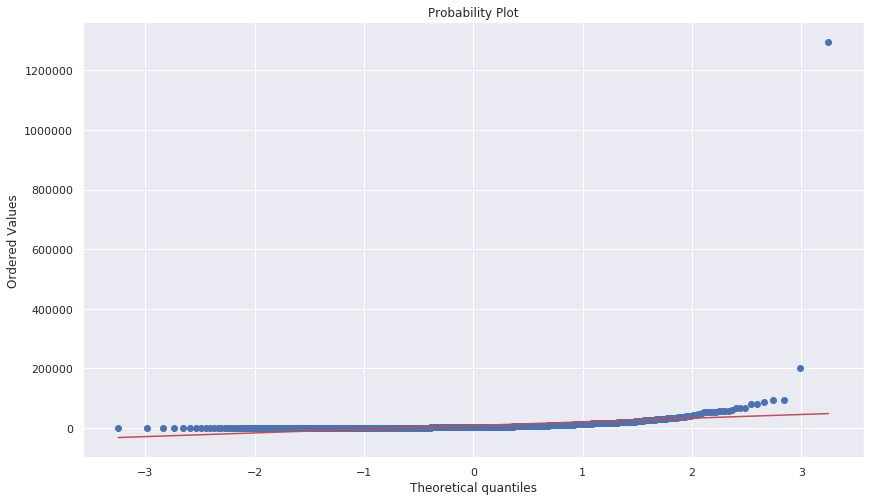

In [35]:
shapiro_wilk_test(orders['revenue'], 'revenue')

### Ожидаемо, распределение денег имеет ненормальный вид (тяжелый правый хвост). Гипотеза о нормальности не подтверждается.
* Следовательно, у нас есть 4 варианта действий:
    1. __Использовать непараметрический критерий__
    2. Использовать бутстреп
    3. Использовать бакетирование
    4. Использовать log преобразование + параметрический тест

### Используем непараметрический U-критерий Манна-Уитни, найдем статистическую значимость

### Mann_Whitney test
* Сформулируем нулевую и альтернативную гипотезу (средние как аппроксимация)
* H0: mean revenue in group B == mean revenue in group A
* H1: mean revenue in group B != mean revenue in group A

In [36]:
def mann_whitney(group1, group2, alpha=0.05):
    '''
    Двухсторонняя проверка по умолчанию - не делаем предположение об изменении метрики
    '''
    alpha = alpha
    results = st.mannwhitneyu(group1, group2)
    pvalue = results.pvalue
    print('p-значение: ', pvalue)
    if (pvalue < alpha):
        print("Отвергаем H0: разница статистически значима")
    else:
        print("Не получилось отвергнуть H0, вывод о различии сделать нельзя")

### Сырые данные

In [37]:
mann_whitney(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

p-значение:  0.3646454927716229
Не получилось отвергнуть H0, вывод о различии сделать нельзя


In [38]:
#посчитаем относительное различие
print("{0:.3f}".format((orders[orders['group']=='B']['revenue'].
                       mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100))

25.871


## Вывод (raw data):
* __p-value: 0.3646. Больше уровня alpha__
* Не можем отвергнуть нулевую гипотезу, хоть и относительное различие между средними чеками в группах составляет 25,8% (превосходство в группе B)
* __Средний чек значимо не изменился.__

### Проверим статистическое различие средних чеков в группах для чистых данных

### Очищенные от выбросов данные

In [39]:
mann_whitney(orders_clear[orders_clear['group']=='A']['revenue'],
                         orders_clear[orders_clear['group']=='B']['revenue'])

p-значение:  0.30743319383007267
Не получилось отвергнуть H0, вывод о различии сделать нельзя


In [40]:
#посчитаем относительное различие
print("{0:.3f}".format((orders_clear[orders_clear['group']=='B']['revenue'].
                       mean()/orders_clear[orders_clear['group']=='A']['revenue'].mean()-1)*100))

2.116


## Вывод (clear data):
* __После удаления выбросов, относительная разница сократилось на 23 процентных пункта!__
* __p-value: 0.3074. Так же больше уровня alpha (что странно, немного изменилось в меньшую сторону).__
* Мы по-прежнему не можем отвергнуть нулевую гипотезу.
* __Средний чек значимо не изменился.__

---

## Посчитаем статистическую значимость метрики Conversion Rate в группе A и B.
   * Для сырых и очищенных данных

### Для этого воспользуемся z-критерием долей

In [41]:
def z_statistic(visit_ab_list,orders_ab_list,alpha=0.05):
    '''
    2х сторонняя проверка
    H0: CR в группе A == CR в группе B
    H1: CR в группе A != CR в группе B
    '''
    alpha = alpha
    purchases = orders_ab_list
    leads = visit_ab_list
    p1 = purchases[0]/leads[0]
    p2 = purchases[1]/leads[1]
    p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    difference = p1-p2
    z_value = difference/mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
    distr = st.norm(0,1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

### Сырые данные

In [42]:
#Создадим датайрфем в котором объединим заказы и визиты по каждой группе
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                        .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion

,group,orders,visitors
0,A,557,18736
1,B,640,18916


In [43]:
conversion['cr'] = conversion.orders/conversion.visitors

In [44]:
visit_ab_list = np.array(conversion['visitors'])
orders_ab_list = np.array(conversion['orders'])

In [45]:
z_statistic(visit_ab_list, orders_ab_list)

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [46]:
conversion

,group,orders,visitors,cr
0,A,557,18736,0.029729
1,B,640,18916,0.033834


In [47]:
#посчитаем относительное различие
(conversion[conversion['group']=='B']['cr'][1]/conversion[conversion['group']=='A']['cr'][0]-1)*100

13.807884655320146

## Вывод (raw data):
* __Уверенно отвергаем нулевую гипотезу__ о равенстве долей, конверсия в группе B превышает конверсию в группе A для __сырых данных.__
* __p-значение:  0.02320__ < уровня значимости alpha (5%)
* Конверсия в группе B значимо больше конверсии в группе A
* __Относительная разница между конверсиями 13,8%__

## Проверим статистическое различие конверсии в группах A и B для очищенных данных

### Очищенные от выбросов данные

In [49]:
#Создадим датайрфем в котором удалим юезров, которые заказывали аномально много и объединим с визитами по каждой группе
orders_new = orders[~orders['visitorid'].isin(TooManyOrdersId)]

conversion_clear = (orders_new.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                        .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [50]:
conversion_clear
conversion_clear['cr'] = conversion_clear.orders/conversion_clear.visitors

In [51]:
visit_ab_list = np.array(conversion_clear['visitors'])
orders_ab_list = np.array(conversion_clear['orders'])

In [52]:
z_statistic(visit_ab_list, orders_ab_list)

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [53]:
#посчитаем относительное различие
(conversion_clear[conversion_clear['group']=='B']['cr'][1]/conversion_clear[conversion_clear['group']=='A']['cr'][0]-1)*100

14.758232773376978

## Вывод (clear data):
* __Уверенно отвергаем нулевую гипотезу__ о равенстве долей, конверсия в группе B превышает конверсию в группе A для __очищенных данных.__
* __p-значение:  0.01982 < уровня значимости alpha (5%). Уменьшилась, по сравнению с raw.__
* Конверсия в группе B значимо больше конверсии в группе A
* __Относительная разница между конверсиями 14,75. Выросла, по сравнению с raw data__

---

## Как внедрение варинта B повлияет в долгосрочной перспективе на другие метрики
### Т.к. мы выяснили, что у нас значимо изменилась конверсия, то сделаем простейшую симуляцию
* Посмотрим как увеличение CR после внедрения нового варианта повлияет на суммарный Revenue за 365 дней (по сравнению с прошлой версией).
    * повторные покупки не учитываются
    * конверсию принимаем за константу на всем периоде

In [56]:
mean_visitors = int((visitors.groupby('date', as_index=False).agg({'visitors':'sum'}).mean()[0])*365)
cr_old = conversion_clear.iloc[0,3]
cr_new = conversion_clear.iloc[1,3]

In [57]:
mean_visitors

443321

In [58]:
#тк средний чек значимо не изменился, то:
mean_bill_clear = orders_clear.groupby('visitorid', as_index=False).agg({'revenue':'sum','transactionid':'nunique'})
mean_bill_clear['mean_bill_per_user'] = mean_bill_clear['revenue']/mean_bill_clear['transactionid']
#обрежем еще немного верхних значений
mean_bill_clear = (mean_bill_clear[mean_bill_clear['mean_bill_per_user']<=
                                  np.percentile(mean_bill_clear['mean_bill_per_user'], 90)])
mean_bill = mean_bill_clear['mean_bill_per_user'].mean()

In [59]:
mean_bill

4072.6418727536516

In [60]:
delta_revenue_a_b = mean_visitors*cr_new*mean_bill-mean_visitors*cr_old*mean_bill
print(f' Внедрение варианта B увеличит нашу прибыль за 365 дней на {delta_revenue_a_b:.1f} ye, по сравнению\
 с вариантом А за тот же период.')

 Внедрение варианта B увеличит нашу прибыль за 365 дней на 7352627.2 ye, по сравнению с вариантом А за тот же период.


---
---
---

# Финальный вывод
* Хотя мы и получили статистически значимые результаты для конверсии - конверсия в группе B статистически превышает конверсию в группе А, мы __не можем остановить тест__. Потому что:
    1. Рассчитанный объем выборки больше, чем выборка, полученная нами. Для нахождения относительного различия метрик в 14%, нам необходимо 27861 наблюдений в каждой группе.
    2. График кумулятивных метрик (по конверсиям) не вышел на плато, те дисперсии могут сильно меняться от даты к дате.
    3. Если остановить тест прямо сейчас, как только он "прокрасился", получим "проблему подглядывания".

![)](http://joxi.ru/gmv4884tq4ldLA.png)

----------

## <span style="color:green">Финальный комментарий от наставника<span>

Проект огонь!

Сделал анализ распределений перед тестом, прекрасно справился с проверкой гипотез, сделал дельные выводы и даже проверил достаточность данных. Молодец!

---------